<a href="https://colab.research.google.com/github/aniketbanerjee03/Data-Analysis/blob/main/Diwali_Sales_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Copy of Diwali Sales Data.csv", encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [ ]:
df.isnull().mean()*100

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

In [ ]:
# Removing missing columns = "Status", "unnamed1"
df.drop(labels = ["Status", "unnamed1"], axis=1, inplace=True)

In [ ]:
# as there is already customers classified by age group, we can drop "Age" column
df.drop("Age", axis=1, inplace=True)

In [ ]:
# We can drop Cust_name for the analysis, but we can keep User_ID for convenience
df.drop("Cust_name", axis=1, inplace=True)

In [ ]:
df.Product_ID.nunique()
# as we can see there is a hight number of unique product ids we can drop this column as we donot need this for our analysis
df.drop("Product_ID", axis=1, inplace=True)

In [ ]:
df.isnull().sum()

User_ID              0
Gender               0
Age Group            0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.Amount.agg(["mean","median"])
# not much dfifference between median and mean

mean      9453.610858
median    8109.000000
Name: Amount, dtype: float64

In [ ]:
# replace missing values in "Amount" with mean values

df.Amount.fillna(df.Amount.mean(), inplace=True)

In [ ]:
df.Amount.isnull().sum() # null values are replaced with mean

0

In [ ]:
df.Product_Category.value_counts()

Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Gender            11251 non-null  object 
 2   Age Group         11251 non-null  object 
 3   Marital_Status    11251 non-null  int64  
 4   State             11251 non-null  object 
 5   Zone              11251 non-null  object 
 6   Occupation        11251 non-null  object 
 7   Product_Category  11251 non-null  object 
 8   Orders            11251 non-null  int64  
 9   Amount            11251 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 879.1+ KB


In [ ]:
df.shape # 'User_ID' is removed

(11251, 10)

In [ ]:
df.Amount = df.Amount.astype('int')

In [ ]:
df.Amount.dtypes

dtype('int64')

In [ ]:
print(df.columns[df.dtypes=="object"])
obj_lst = ['Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Product_Category']

Index(['Gender', 'Age Group', 'State', 'Zone', 'Occupation',
       'Product_Category'],
      dtype='object')


Univariate Analysis

categorical

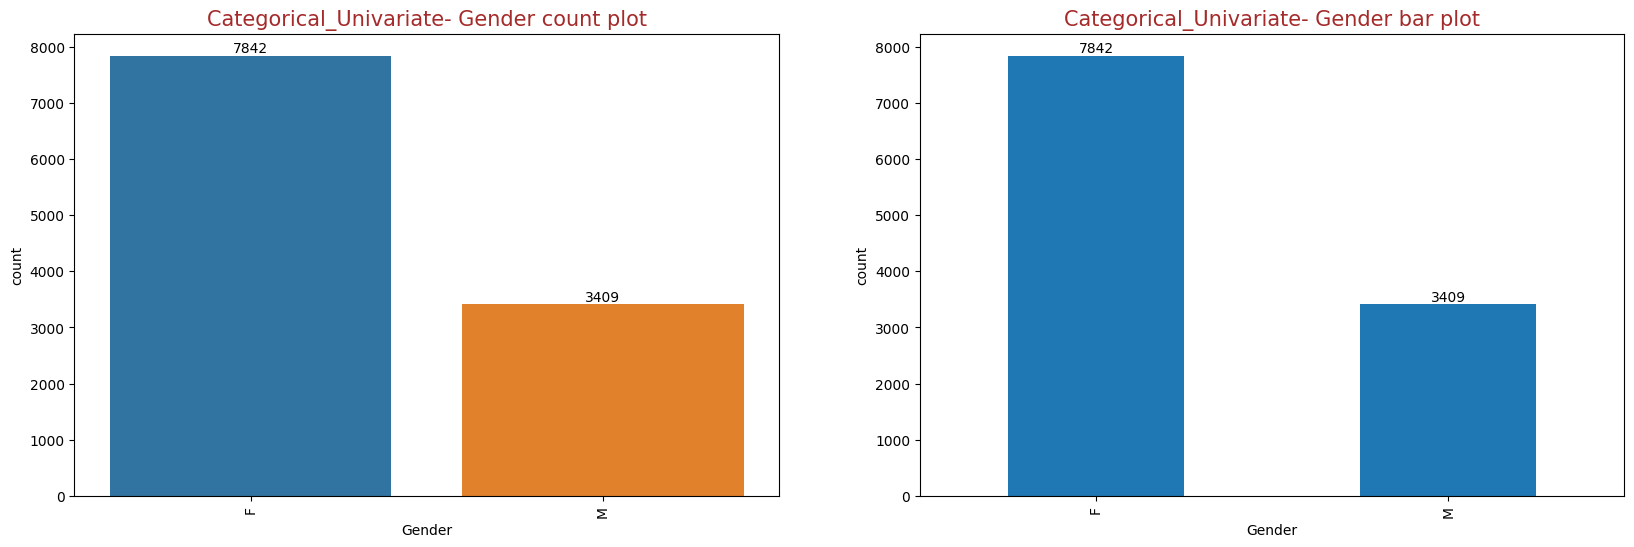

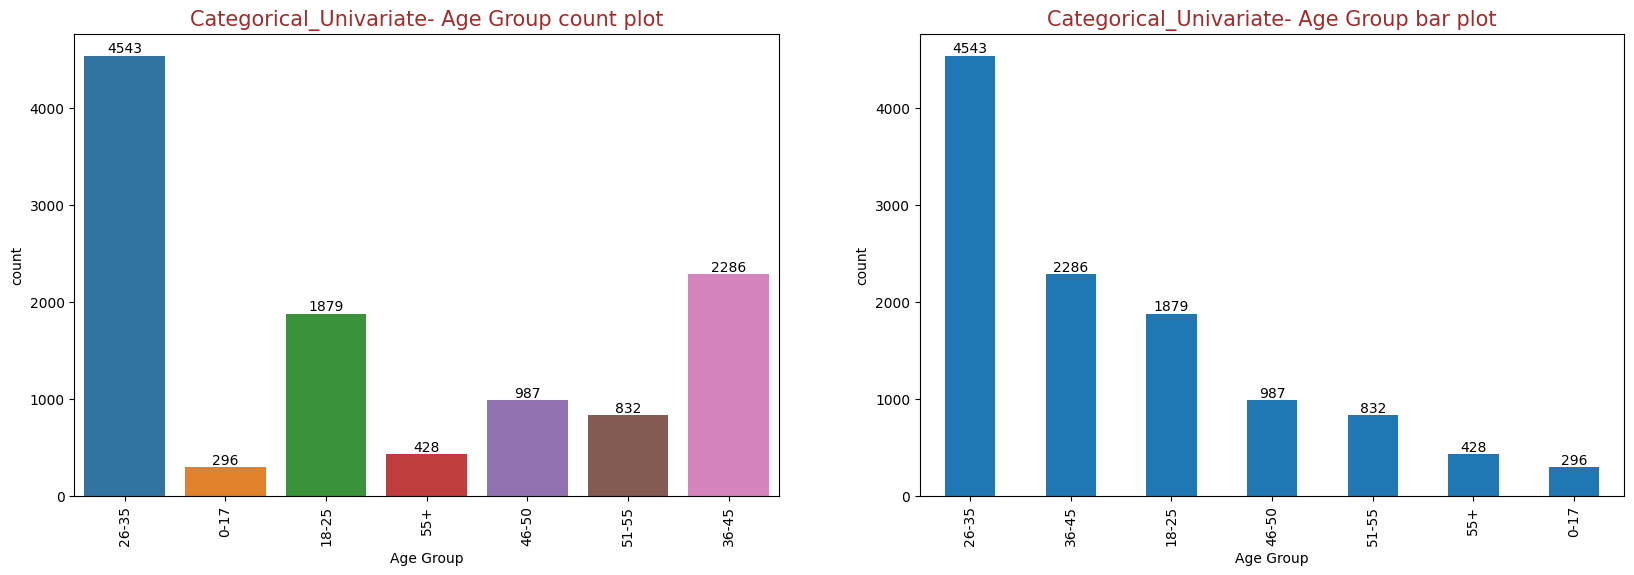

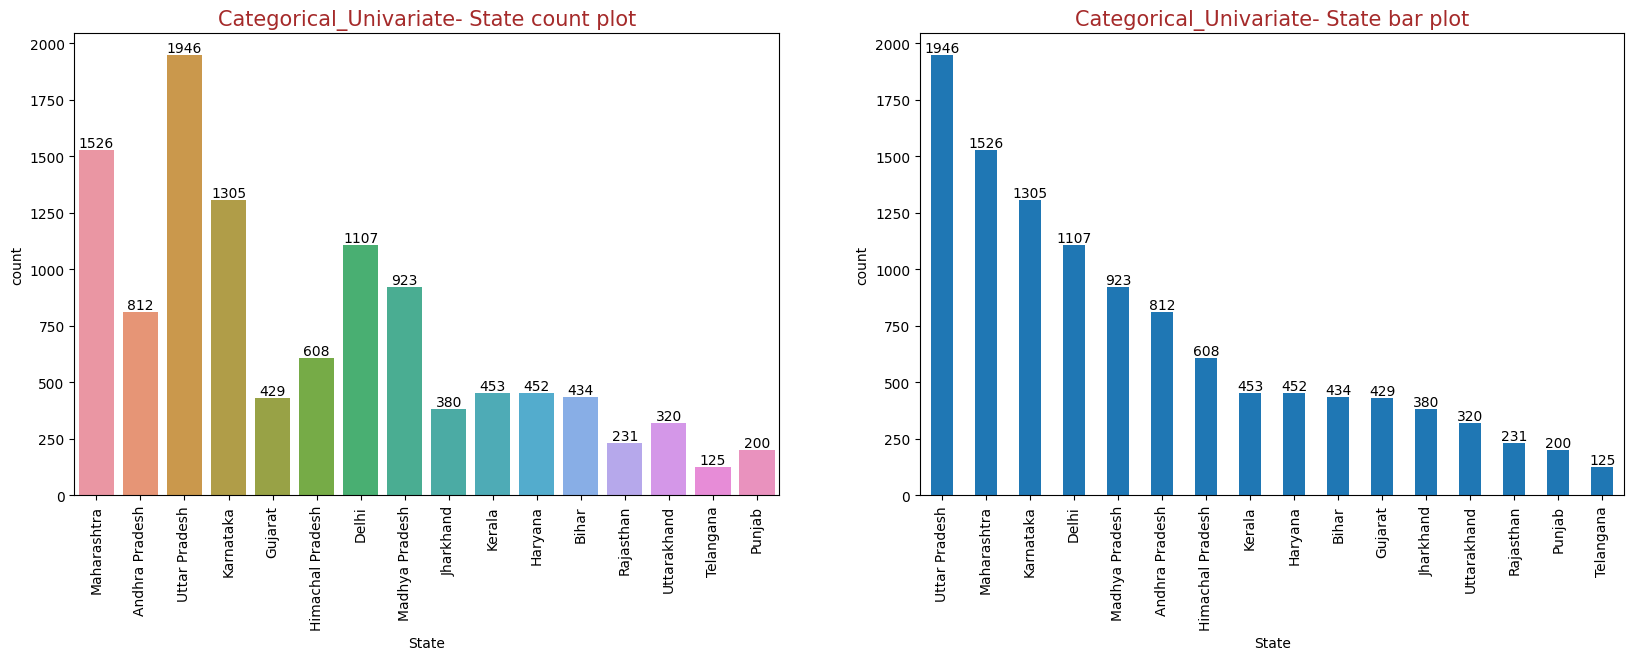

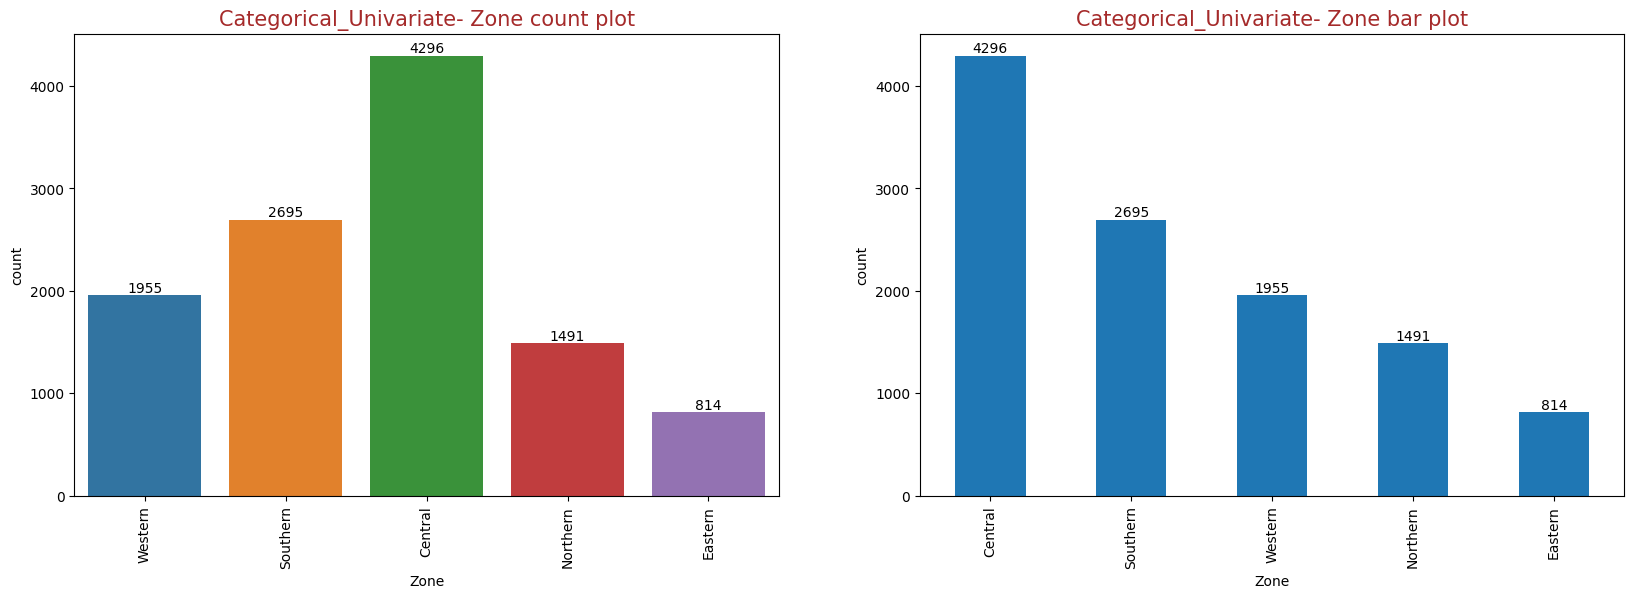

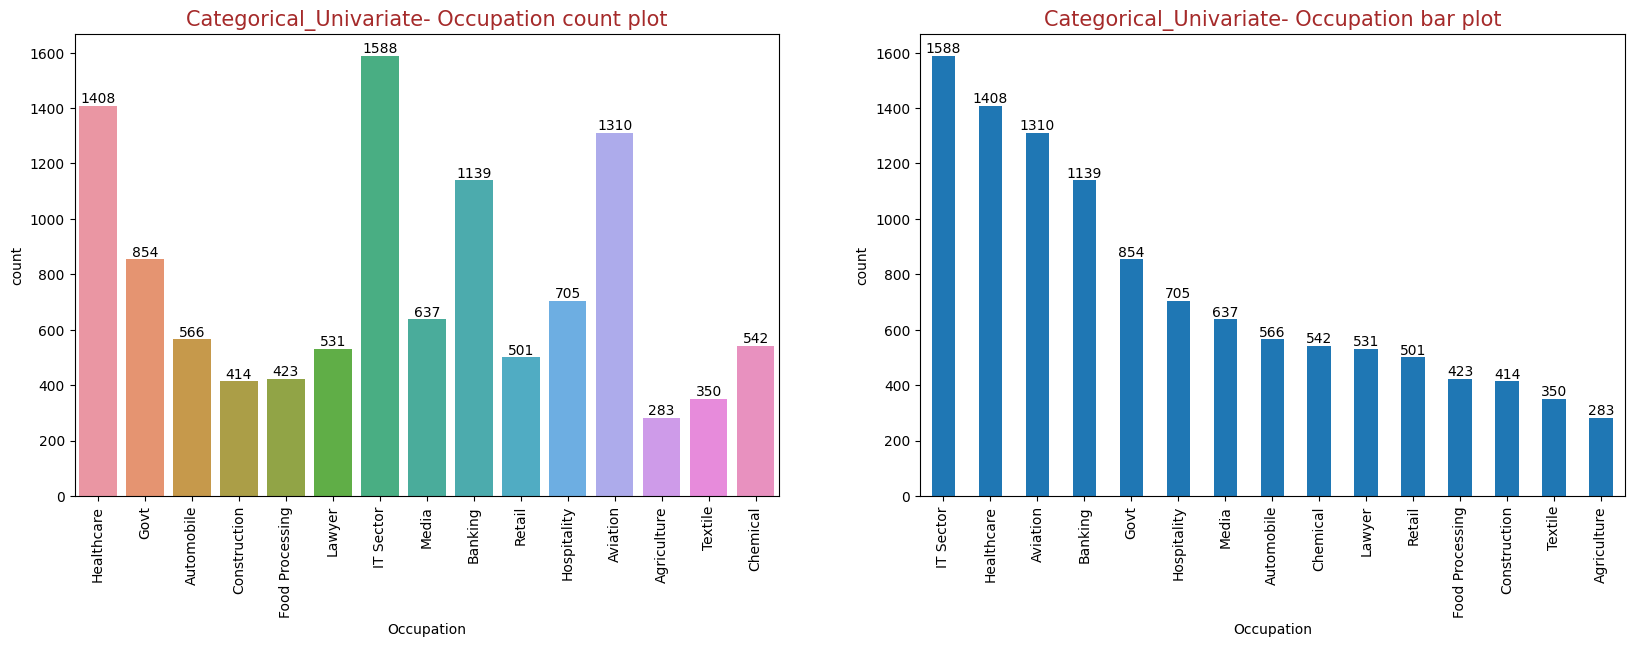

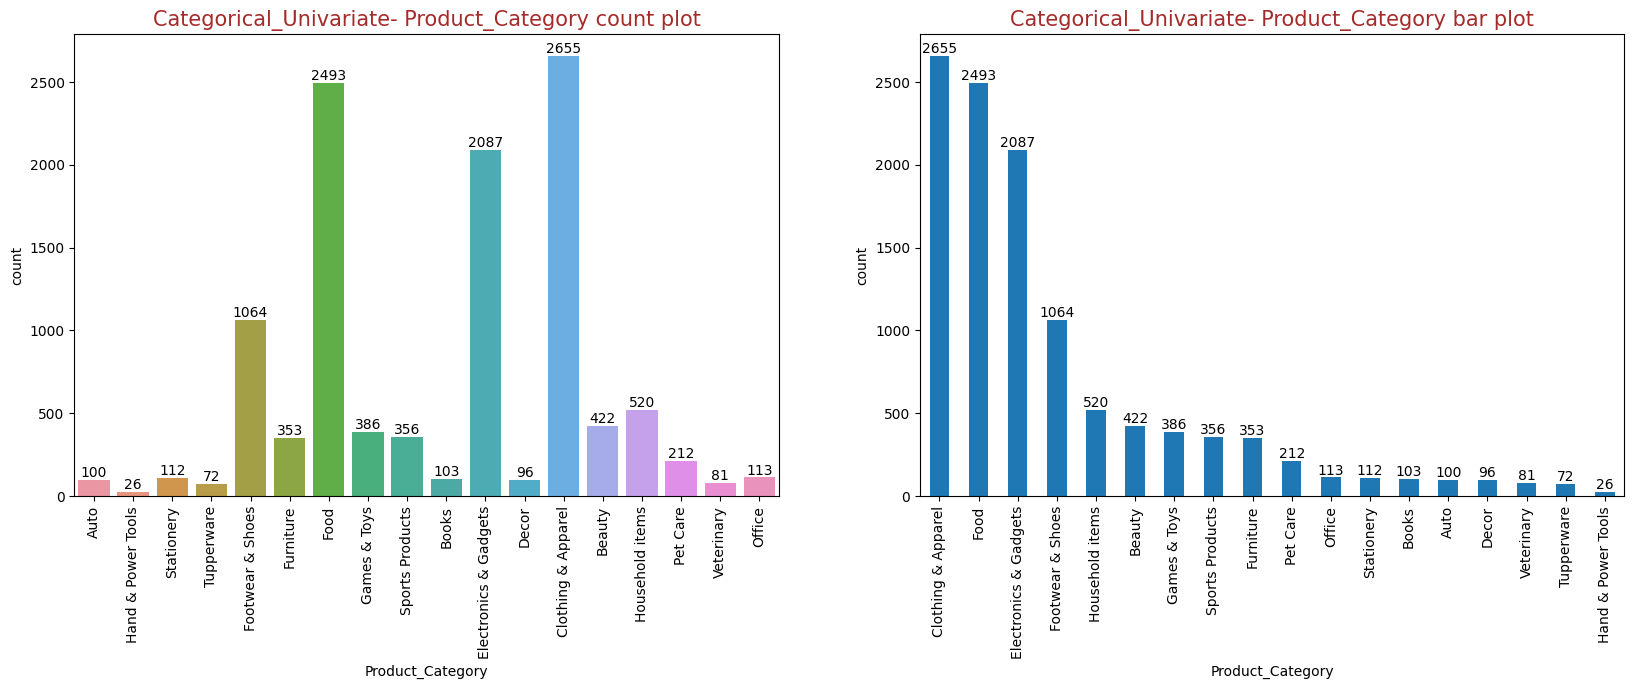

In [ ]:
for i in obj_lst:
  plt.figure(figsize=(20,6))
  plt.subplot(1,2,1)
  plt.title(f"Categorical_Univariate- {i} count plot", fontdict={"fontsize":15,"color":"brown"})
  ax = sns.countplot(data=df, x=i)
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.xticks(rotation=90)
  plt.subplot(1,2,2)
  plt.title(f"Categorical_Univariate- {i} bar plot", fontdict={"fontsize":15,"color":"brown"} )
  ab = df[i].value_counts().plot.bar()
  for bar in ab.containers:
    ab.bar_label(bar)
  plt.xticks(rotation=90)
  plt.xlabel(i)
  plt.ylabel("count")
  plt.show()

Observation:
- Gender:
- - Females did most of the purchasing than Males
- Age Group:
- - Age group from 26-35 did the most purchasing followed by age groups 36-45 and 18-25
- - Age group 0-17 did the least purchasing with second least being the customers with age 55+
- State:
- - Uttar Pradesh has the highest number of purchasing, then comes Maharashtra.
- - Karnataka marks the third highest state and tops Delhi with a small difference, which is the 4th highest state in purchasing.
- - Telangana is the state with least purchasing.
- - Punjab has the second least purchasing topped by Rajasthan with a small difference, being the third least purchasing state.
- Zone:
- - The most purchasing can be found from the Central zone, with a huge difference with the Southern zone which is the second highest zone to purchase.
- - Eastern zone marks the least purchasing, topped by the Northern zone, which the second least purchasing state.
- - Western zone comes in the middle, topping Northern zone, being the third highest purchasing state.
- Occupation:
- - IT Sector marks the highest purchase topping Healthcare and Aviation, which are the second and the third highest purchasing occupations respectively.
- - People from Agriculture marks the least purchasing, which is topped by Textile and Construction, being the second least and the third least occupations to purchase Diwali items respectively.
- Product Category:
- - Highest purchasing is seen in Clothing & Apparel and the second highest is seen in Food with a minor difference between them.
- - A huge difference in purchase, which is almost double, is seen is purchasing of Electronics & Gadgets and Footwear & Shoes, which are the third highest and the fourth highest categories to be purchased  in Diwali, respectively.
- - Again a huge difference in purchase, which is more than double, is seen in Footwear & Shoes and Household items, which are the third and the fourth highest item categories to be purchased in Diwali, respectively.
- - Hand & Powertools marks the category of least purchase, which is topped by Tupperware, Veterinary, Decor, Auto, Books, Stationery and Office with minor differences in them, which are the second, third, fourth, fifth, sixth, seventh and eighth least items to be purchased in Diwali, respectively.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Gender            11251 non-null  object
 2   Age Group         11251 non-null  object
 3   Marital_Status    11251 non-null  int64 
 4   State             11251 non-null  object
 5   Zone              11251 non-null  object
 6   Occupation        11251 non-null  object
 7   Product_Category  11251 non-null  object
 8   Orders            11251 non-null  int64 
 9   Amount            11251 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 879.1+ KB


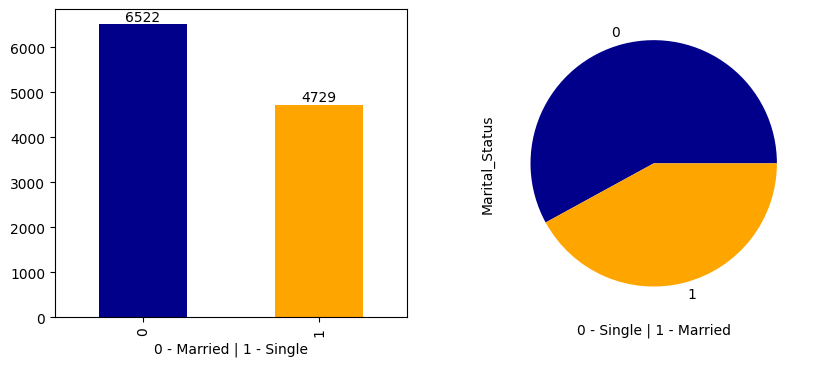

In [ ]:
# Univariate analysis of numerical column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ms = df.Marital_Status.value_counts().plot.bar(color=["darkblue",'orange'])
for bar in ms.containers:
  ms.bar_label(bar)
plt.xlabel("0 - Married | 1 - Single")
plt.subplot(1,2,2)
df.Marital_Status.value_counts().plot.pie(colors=["darkblue",'orange'])
plt.xlabel("0 - Single | 1 - Married")
plt.show()

Observation:

By the above bar plot and the pie plot we can conclude that Married people have purchased more Diwali items - 6522, than Single people - 4729.

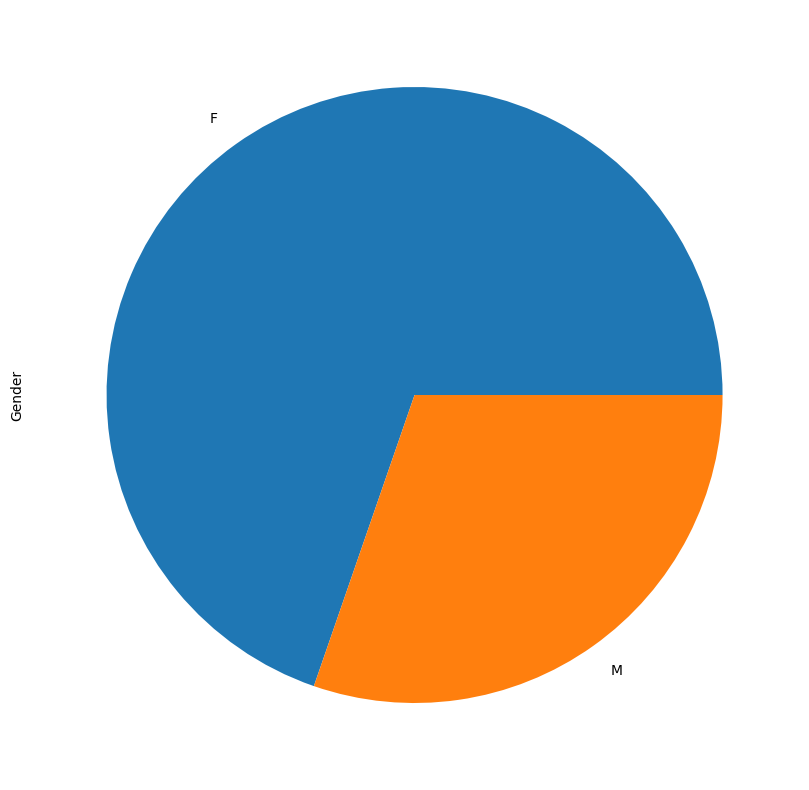

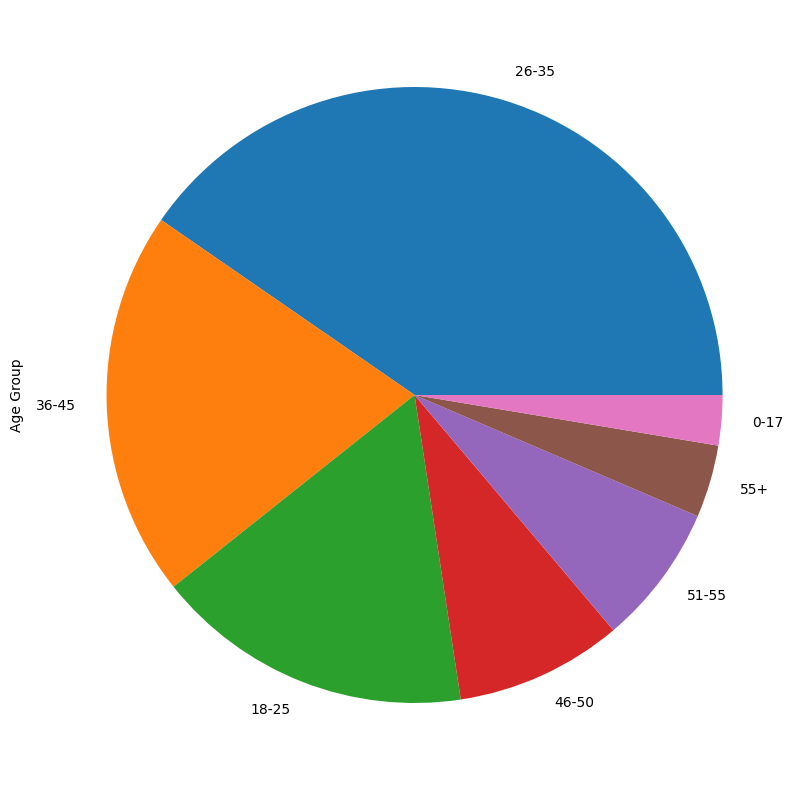

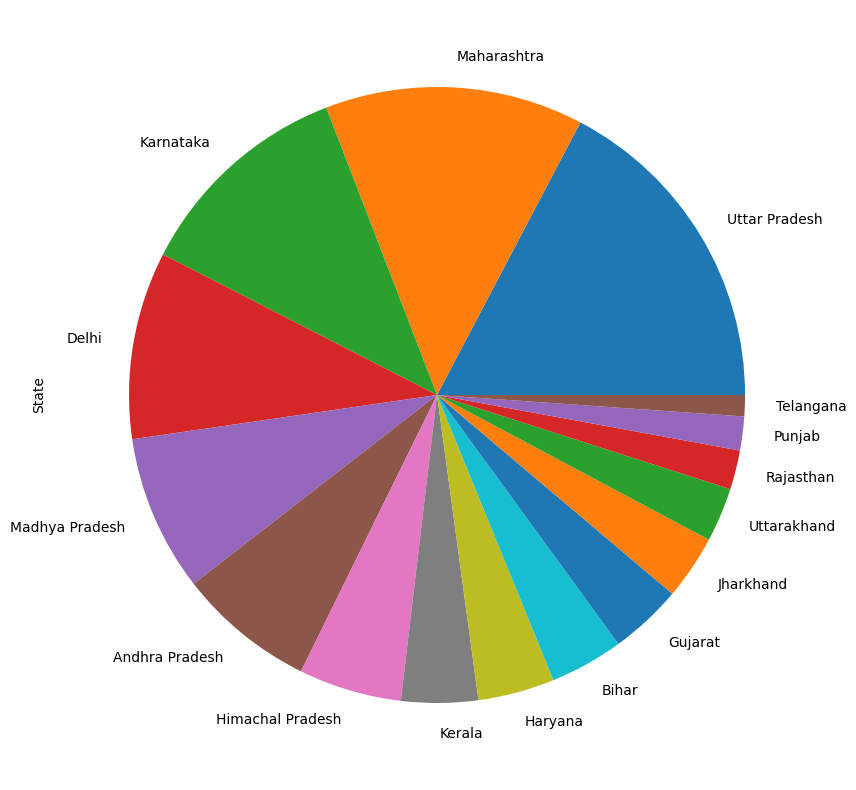

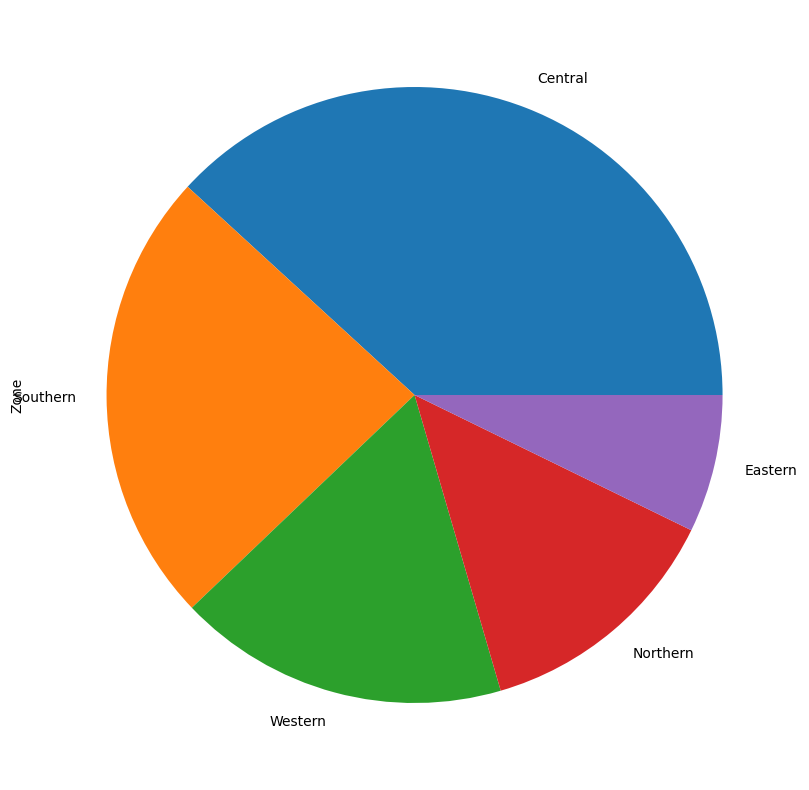

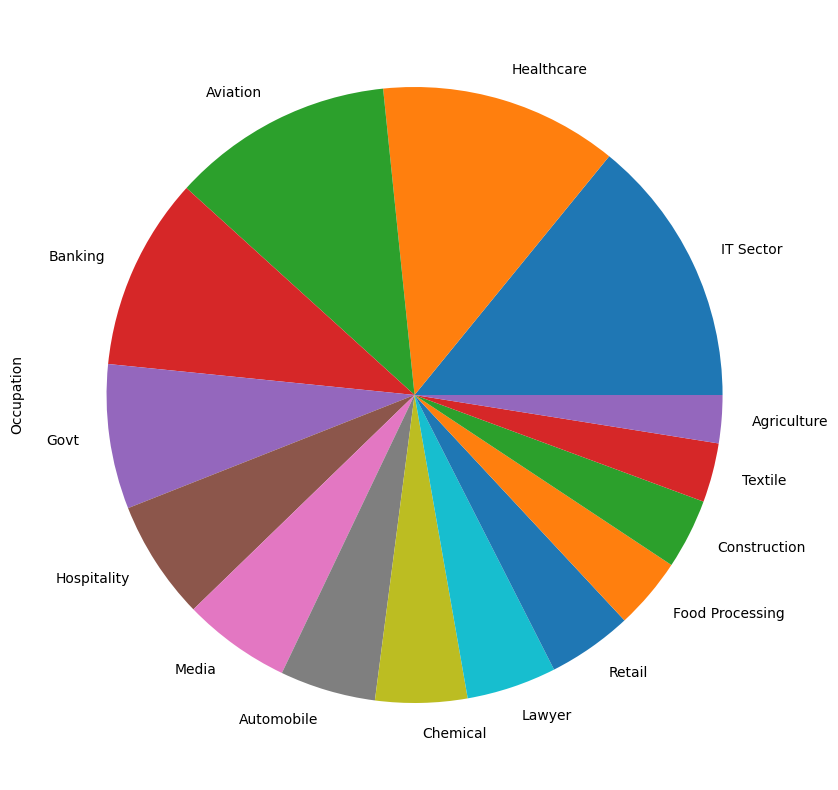

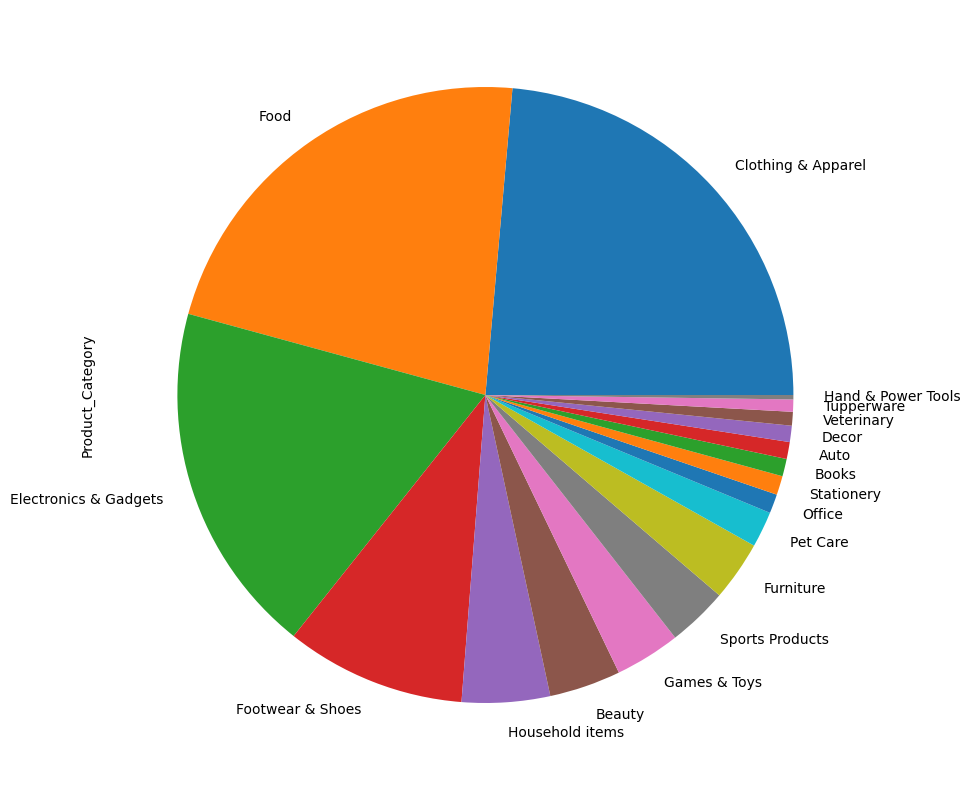

In [ ]:
for i in obj_lst:
  plt.figure(figsize=(20,10))
  df[i].value_counts().plot.pie()
  plt.show()

Observation:

We can also plot pie charts for the categorical univariate columns and draw the same conclusions with more more clarity.

In [ ]:
df.head(7)

,User_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,M,26-35,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,F,18-25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841


In [ ]:
df.Amount = df.Amount.apply(lambda x: round((x/1000),1)) # Converting amount in terms of thousands "K"
df.head()

,User_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,24.0
1,1000732,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23.9
2,1001990,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23.9
3,1001425,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23.9
4,1000588,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23.9


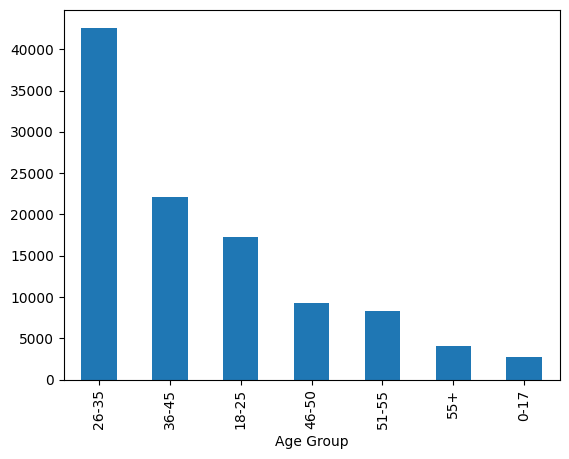

In [ ]:
df.groupby("Age Group")["Amount"].sum().sort_values(ascending=False).plot.bar()
plt.show()

In [ ]:
age_amount = df.groupby("Age Group")[["Amount"]].sum()
age_amount.reset_index(inplace=True)

In [ ]:
age_amount

,Age Group,Amount
0,0-17,2699.8
1,18-25,17242.6
2,26-35,42638.7
3,36-45,22173.4
4,46-50,9245.6
5,51-55,8280.1
6,55+,4090.5


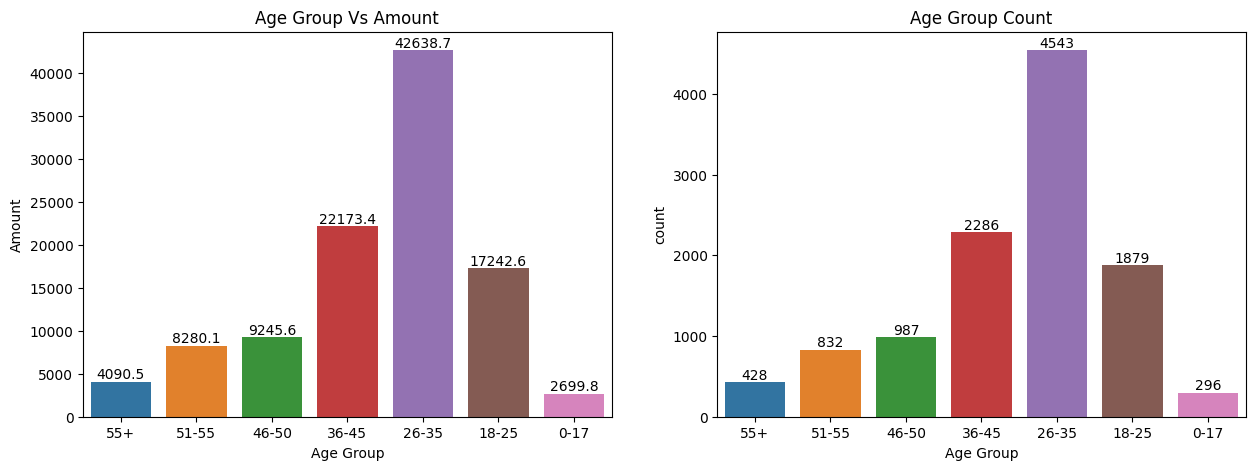

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Age Group Vs Amount")
ag_am =sns.barplot(data=age_amount, x="Age Group", y="Amount", order=sorted(df["Age Group"].unique(), reverse=True))
for bars in ag_am.containers:
  ag_am.bar_label(bars)
plt.subplot(1,2,2)
plt.title("Age Group Count")
ax = sns.countplot(data=df, x="Age Group", order=sorted(df["Age Group"].unique(), reverse=True))
for barss in ax.containers:
  ax.bar_label(barss)
plt.show()

Observation:
- We have already seen the above right side univariate count plot of Age group and have concluded which age group bought the maximum and the least number of Diwali items.
- Now, from the left side bivariate comparison between Age Group and Amount we can see how much the each age groups have spent while buying Diwali itemms
- The age group 26-35 spent the maximum amount of 40311K
- The age group 0-17 spent the minimum amount of 2553K

In [ ]:
gd_am = df.groupby("Gender")[["Amount"]].sum()
gd_am.reset_index(inplace=True)
gd_am

,Gender,Amount
0,F,74436.0
1,M,31934.7


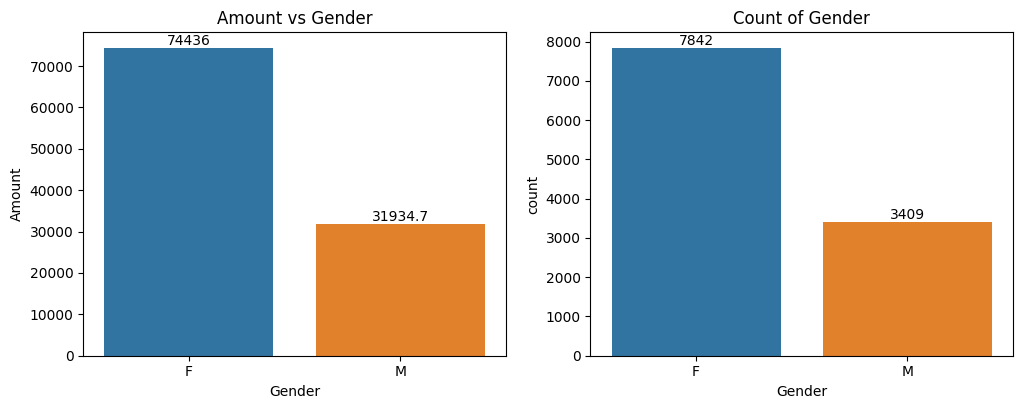

In [ ]:
plt.figure(figsize=(12,4.2))
plt.subplot(1,2,1)
plt.title("Amount vs Gender") # bivariate plot between one categorical and one numerical variable
ax = sns.barplot(data=gd_am, x="Gender", y="Amount")
for bars in ax.containers:
  ax.bar_label(bars)

plt.subplot(1,2,2)
plt.title('Count of Gender')
az = sns.countplot(data=df, x="Gender")
for barss in az.containers:
  az.bar_label(barss)
plt.show()

Observation:
- From the above right univariate analysis of the two genders we have already seen that Females made more purchase of Diwali items than Men.
- Now, from the left bivariate analysis between Gender and Amount, we can conclude that women spent more amount - 70415K, in buying Diwali items, than men - 30234K.

In [ ]:
ms_am = df.groupby("Marital_Status")[['Amount']].sum()
ms_am.reset_index(inplace=True)
ms_am

,Marital_Status,Amount
0,0,62167.8
1,1,44202.9


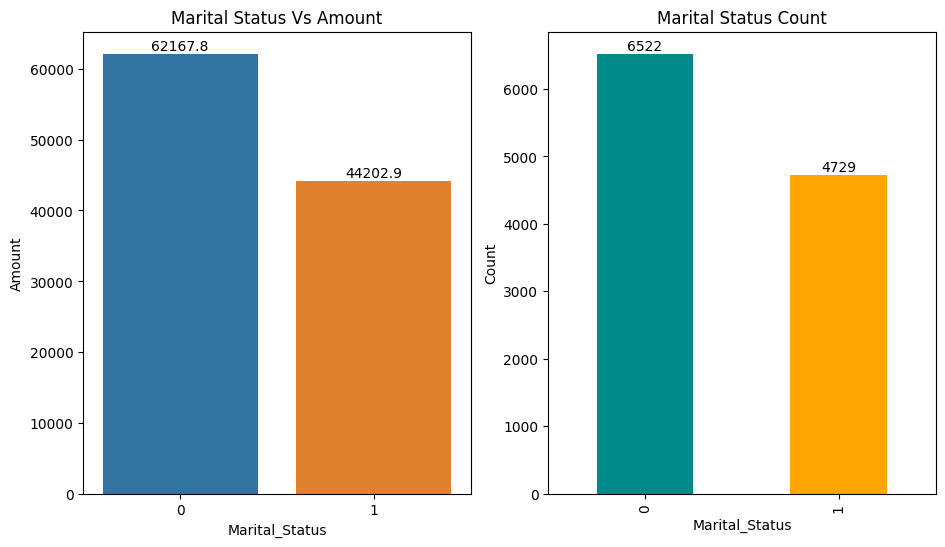

In [ ]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.title("Marital Status Vs Amount") # Bivariate plot between two numerical variables
ms = sns.barplot(data=ms_am,x="Marital_Status",y="Amount")
for bars in ms.containers:
  ms.bar_label(bars)
plt.subplot(1,2,2)
plt.title("Marital Status Count")
ms = df.Marital_Status.value_counts().plot.bar(color=["darkcyan",'orange'])
for bar in ms.containers:
  ms.bar_label(bar)
plt.xlabel("Marital_Status")
plt.ylabel("Count")
plt.show()

Observation:
- We have already seen the above univariate plot on the right, and we know that Married people have bough more Diwali items than Single people.
- Now, looking at the bivariate columns on the left, by analysing Marital Status Vs Amount, we can see that Married people have spent more on Diwali items - 62167.8K, whereas Single people have spent less - 44202.9K.

Plotting rest of the category columns using loop for Bivariate analysis of the Category column of with the Numerical Amount Column

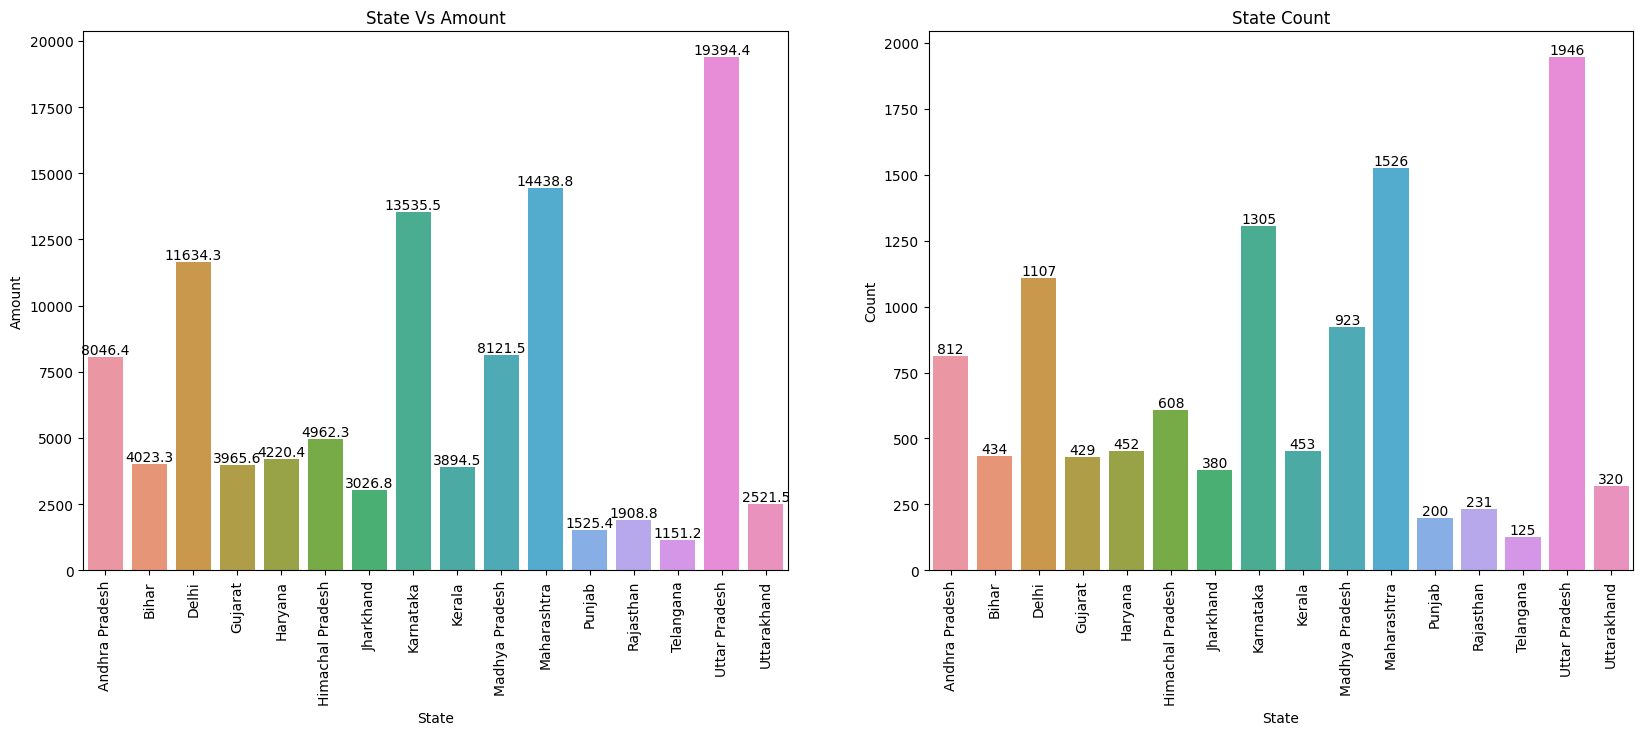

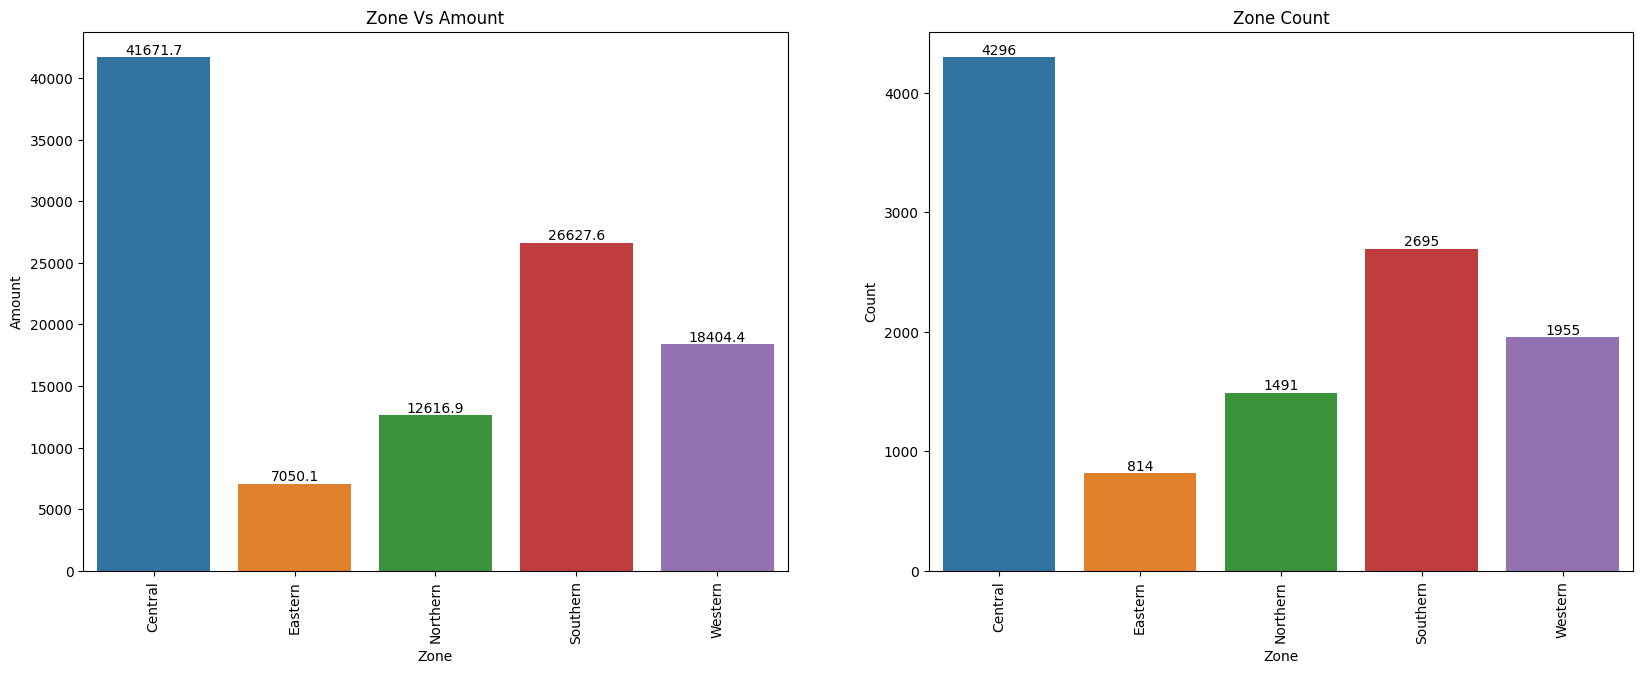

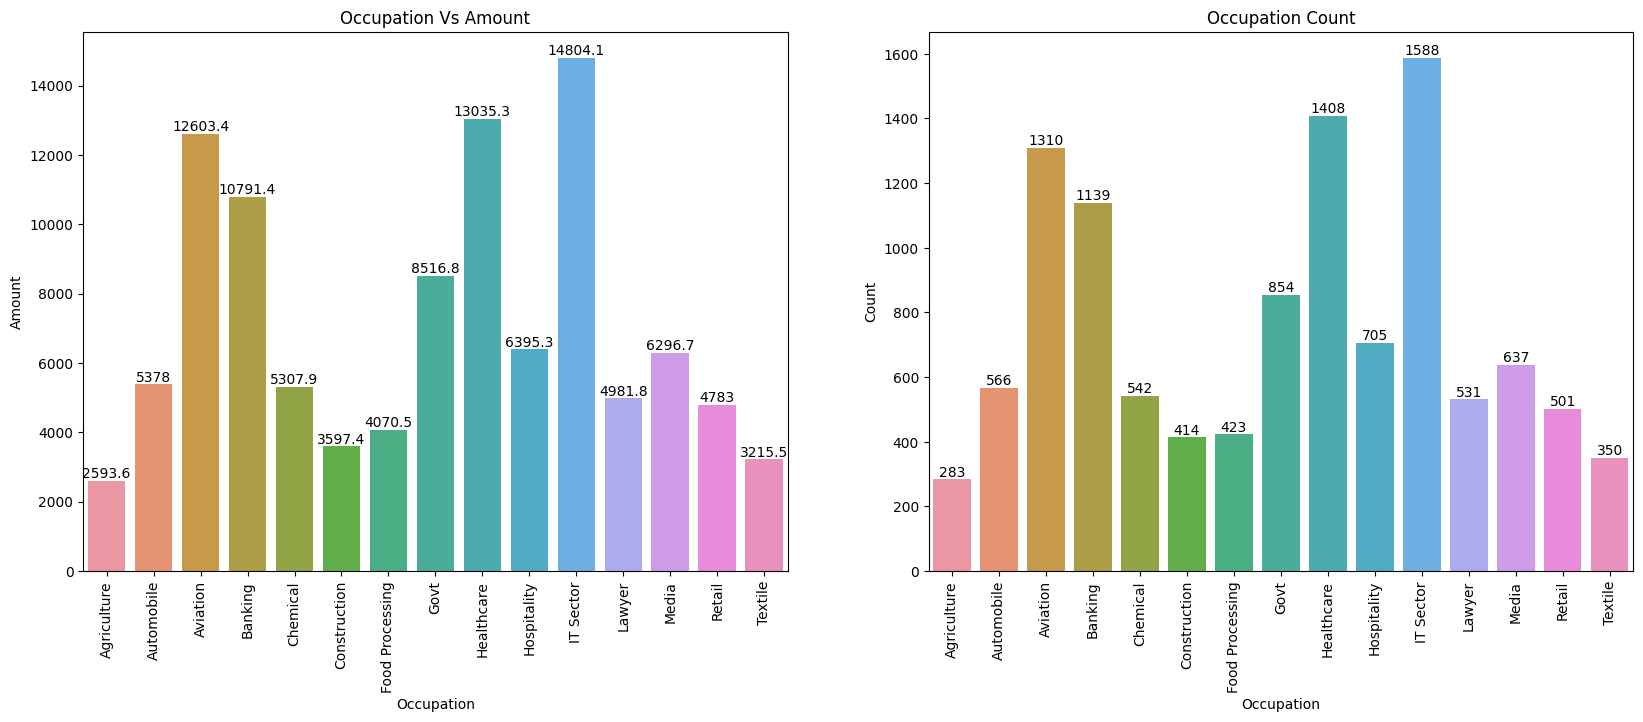

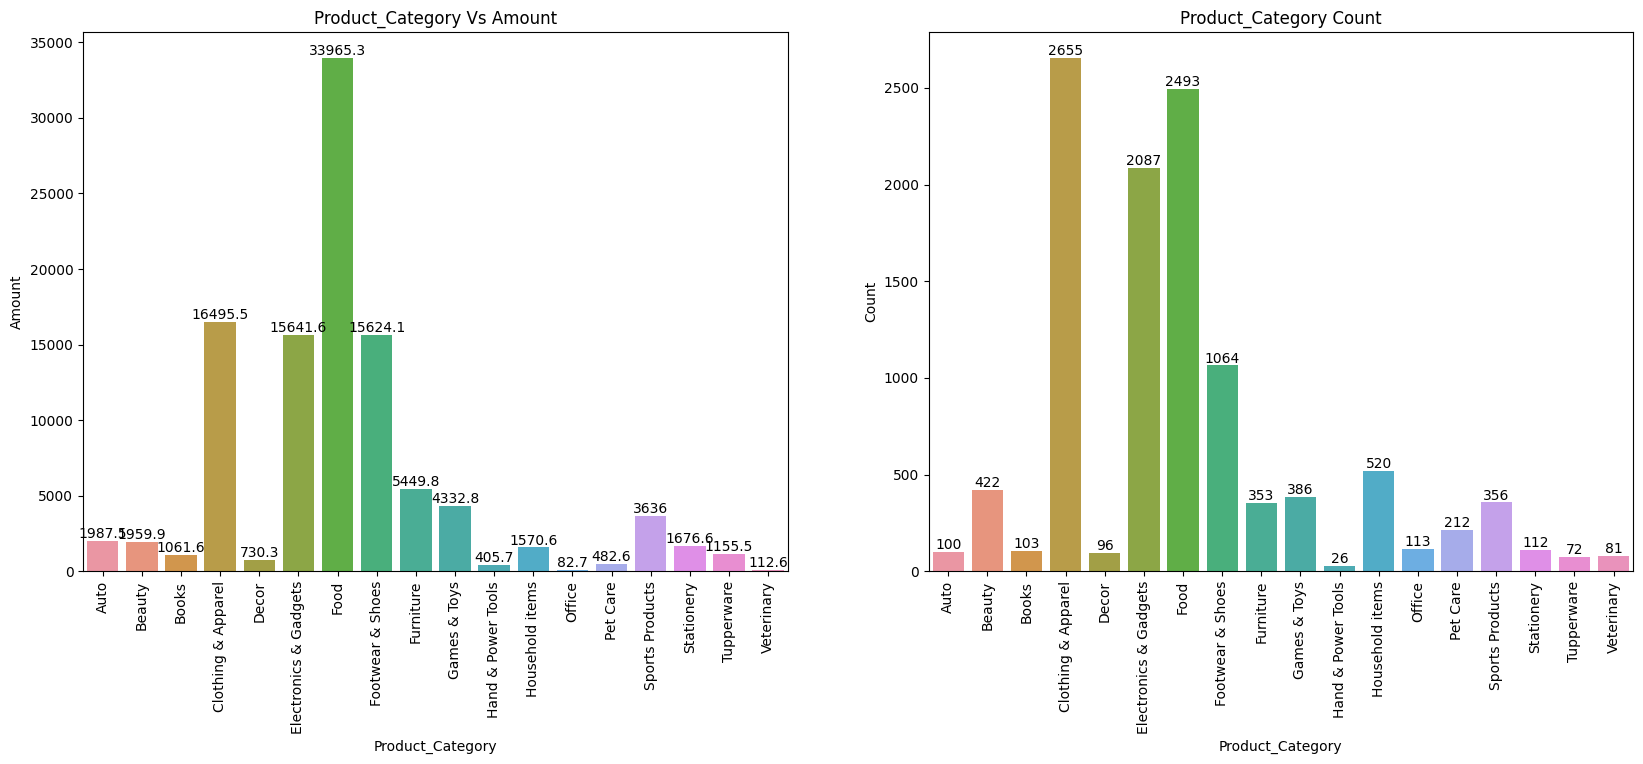

In [ ]:
lst = ["State","Zone","Occupation","Product_Category"]
for i in lst:
  a=(df.groupby(i)[["Amount"]].sum())
  a.reset_index(inplace=True)
  plt.figure(figsize=(20,7))
  plt.subplot(1,2,1)
  plt.title(f"{i} Vs Amount")
  ax = sns.barplot(data=a,x=i,y="Amount", order=sorted(a[i].unique(), reverse=False))
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.xticks(rotation=90)
  plt.subplot(1,2,2)
  plt.title(f"{i} Count")
  cp = sns.countplot(data=df, x=i, order=sorted(a[i].unique(), reverse=False))
  for barss in cp.containers:
    cp.bar_label(barss)
  plt.xlabel(i)
  plt.ylabel("Count")
  plt.xticks(rotation=90)
plt.show()

Observations:
- State Vs Amount
 - on the right we see the univariate analysis of the states, where we see the count of purchase made by the states.
 - on the left we see the bivariate analysis of the categorical column State vs the numerical column Amount.
 - We see the amount each state has spent in purchasing the Diwali items.
 - Uttar Pradesh has spent the maximum amount of 19394.4K and Telangana has spent the least amount of 1151.2K to buy Diwali items.
- Zone Vs Amount
 - On the right we see the univariate analysis of the zones, where we see the count of purchase made by each zone.
 - One the left we see the bivariate analysis of the categorical column Zone vs the numerical column Amount.
 - We see the amount each state has spent in purchasing the Diwali items.
 - We see that Central zone spends the highest amount of 41671.1K and Eastern zone spends the least amount of 7050.1K to buy the Diwali items.
- Occupation Vs Amount
 - on the right we see the univariate analysis of the occupations, where we see the count of purchase made by each occupation.
 - on the left we see the bivariate analysis of the categorical column Occupation vs the numerical column Amount.
 - We see the amount each occupation has spent in purchasing the Diwali items.
 - We can see that the IT Sector employees has spent the maximum amount of 14804.1K whereas the Agriculture sector has spent the least amount of 2593.6K to buy the Diwali items.
- Product Category
 - On the right we see the univariate analysis of the Product Category column, where we see the product category that had the maximum count of purchase.
 - One the left we see the bivariate analysis of the categorical column Product Category vs the numerical column Amount.
 - We see the amount spent in purchasing the specific product categories on Diwali items.
 - We see that an interesting observation in the bivariate analysis, most amount was spent on food followed by clothing and apparel whereas the most item purchased was clothing and apparel followed by food.
 - The third and fourth highest products to be purchased and amount spent were Electronics & Gadgets and Footwear & Shoes respectively, but the difference in amount spent of them is very less compared to the high count of Electronics & Gadgets sold with respect to Footwear & Shoes.
 - From the graph on right we can see Household items making the fifth most product category to be sold whereas we can see that it made even less amount than Sports Products, Auto, Beauty and Stationery products respectively.
 - Auto products are sold in much less count than Beauty products and slightly less than Books whereas slightly more amount was paid on Auto products than Beauty products followed by Books.
 - Similarly, less Tupperware items were bought compare to Veterinary and Office items, whereas more amount was paid on Tupperware items followed by Veterinary followed by Office items.
 - The least product being sold was Hand & Power tools whereas the least amount was made by Office items.

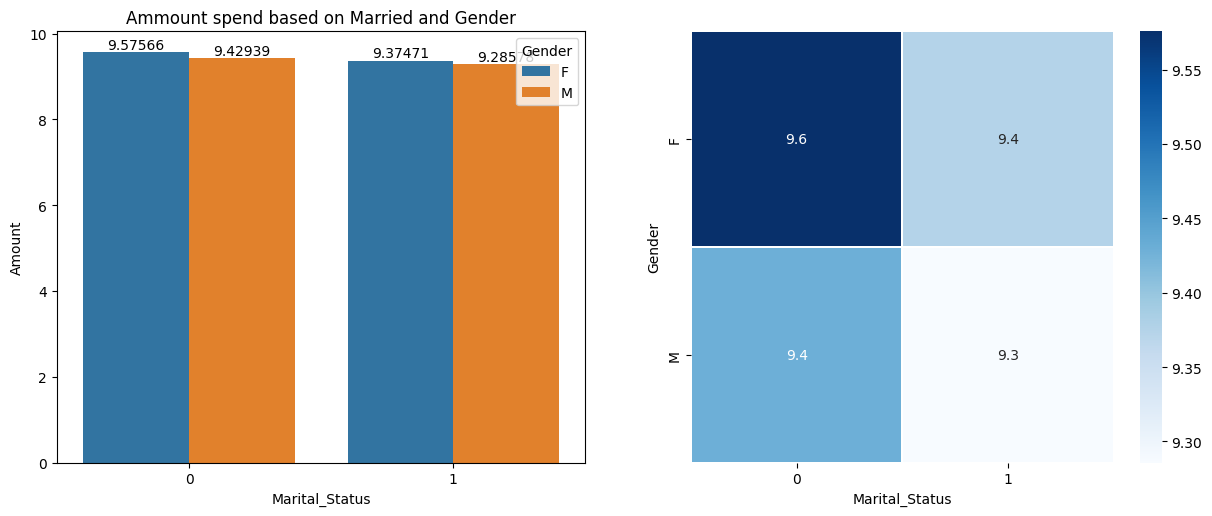

In [ ]:
# Multivariate analysis of Gender and Marital_Status vs Amount spent
plt.figure(figsize=(15,5.6))
plt.subplot(1,2,1)
mg = sns.barplot(data=df,x="Marital_Status",y="Amount", hue="Gender", ci=None)
plt.title("Ammount spend based on Married and Gender")
for bas in mg.containers:
  mg.bar_label(bas)
plt.subplot(1,2,2)
sns.heatmap(pd.pivot_table(data=df, index="Gender", columns="Marital_Status", values="Amount"), cmap="Blues", annot=True, linewidth=0.2)
plt.show()

Observations:

From the above bar plot and head map we can understant the following -

- More amount was spent by married females than married men.
- Single people paid spent amount than Married people
- Single females spent more amount than single men.

<Axes: xlabel='Zone', ylabel='Gender'>

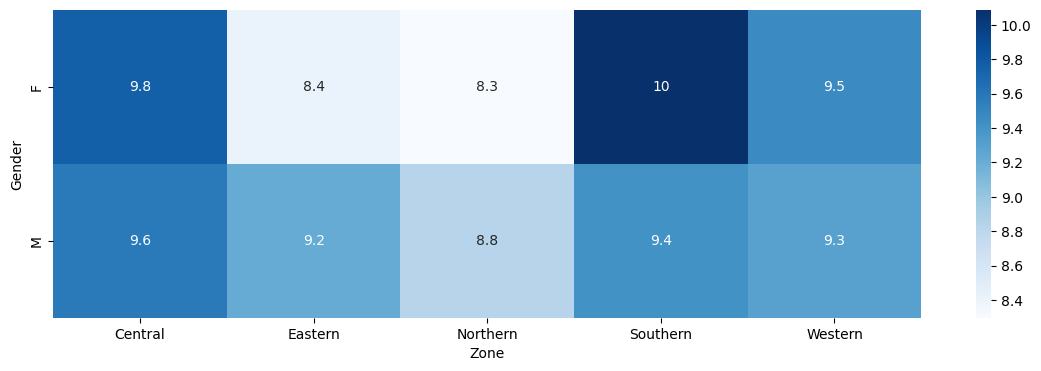

In [ ]:
plt.figure(figsize=(14,4))
sns.heatmap(pd.pivot_table(data=df, index="Gender", columns="Zone", values="Amount"),cmap="Blues",annot=True)

Observation:
- Females from southern zone spent most amount followed by Central zone, followed by Western zone; Nothern zone has the least number of women to spend an amount on Diwali items, Eastern zone being the second last zone.
- Males from Central zone spends the most amount followed by Southern zone followed by Western zone; Nothern zone has the least number of men to spend an amount on Diwali items, Eastern zone being the second last zone.

<Axes: xlabel='Age Group', ylabel='Product_Category'>

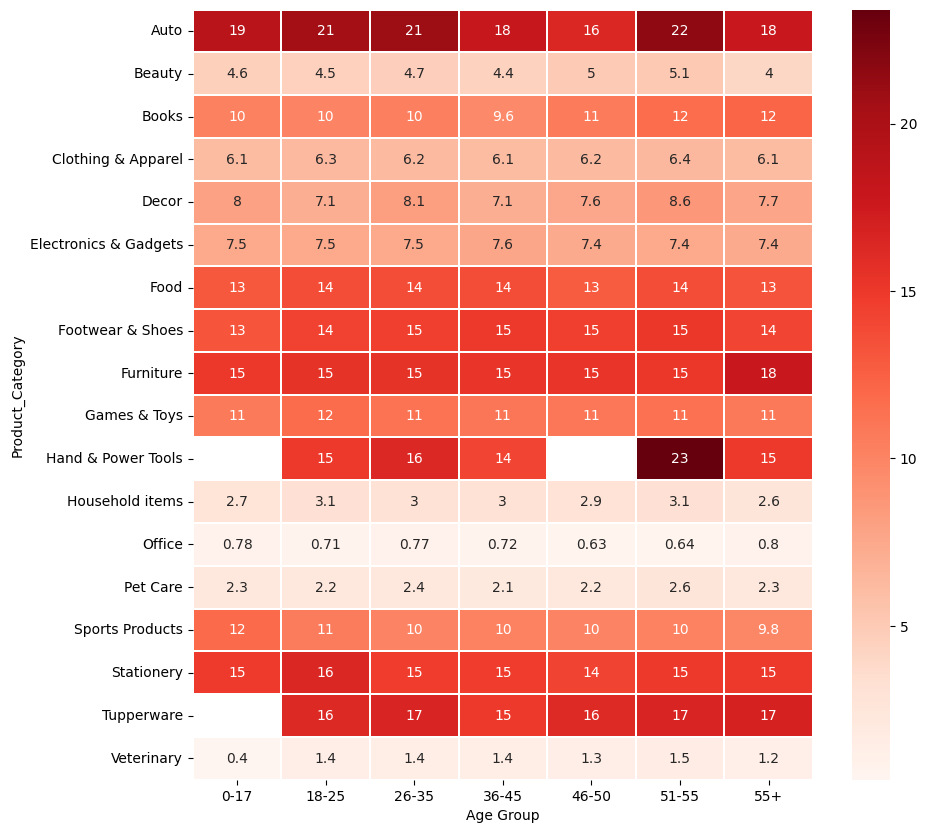

In [ ]:
# Multivariate Analysis to understand Age Group spending their Amount on Product Category
# Two category columns and one Numerical columns

plt.figure(figsize=(10,10))
sns.heatmap(pd.pivot_table(data=df, index= "Product_Category", columns="Age Group", values="Amount"), cmap="Reds", annot=True, linewidth=0.2)

Observations:
- No amount was spent on Tupperware and Hand & Power Tools by age group 0-17. The maximum amount paid by this age group was on Auto items and the least amount being paid on Veterinary and Office items.
- Most amount spent by age groups 18-25 and 26-35 are Auto items and least amoun wasn spent was Office items followed by veterinary items.
- Most amount spent by age group 36-45 is Auto items, the least being Office items.
- Age group 46-50 spends most amount on Veterinary and Auto items, whereas least amount paid by the was on Office items. They also didnot spend any amount on Hand & Power Tools.
- Maximum amount spent on any product was Hand & Power tools by the age group 51-55, followed by Auto items. The least amount paid by them was on Office items.
- People above the age 55 spent their maximum amount on Auto and Furniture items follwed by Tupperware. The least amount spent by this group was on Office items.